## AIVLE 미니 프로젝트 4차
*  KT 스팸 차단 서비스 - 스마트 차단 서비스
*  스팸 분류 AI 프로젝트

In [1]:
# 필요 라이브러리 설치
!pip install konlpy pandas seaborn gensim wordcloud mecab-ko

     ---------------------------------------- 19.4/19.4 MB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 24.0/24.0 MB 5.9 MB/s eta 0:00:00
     -------------------------------------- 152.9/152.9 kB 9.5 MB/s eta 0:00:00
     -------------------------------------- 500.6/500.6 kB 7.8 MB/s eta 0:00:00
     ------------------------------------- 344.6/344.6 kB 10.8 MB/s eta 0:00:00
     -------------------------------------- 983.8/983.8 kB 8.9 MB/s eta 0:00:00
     ---------------------------------------- 58.6/58.6 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 33.2/33.2 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mecab-ko-dic: filename=mecab_ko_dic-1.0.0-py3-none-any.whl size=33424414 sha256=2a2804e9da51bd605329cb6cd1733ba2008a729bf41452566af7d820fe8ad7bc
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\c2\c6\6d\d7789f7fb7f60e98

In [53]:
import sklearn
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
fm.findSystemFonts()
plt.rcParams['font.family']= ["Malgun Gothic"]
plt.rcParams["axes.unicode_minus"]=False
# GPU 환경 설정하기
# assert tf.test.is_gpu_available() == True, 'GPU 설정을 확인하세요.'
# print(tf.config.list_physical_devices('GPU'))
# print(tf.config.list_logical_devices('GPU'))

### 데이터 불러오기
* 대한민국 헌법 데이터

In [1]:
# 데이터 불러오기
from konlpy.corpus import kolaw

constitution = kolaw.open('constitution.txt').read()

In [2]:
print(constitution)

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.
  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.
  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.
②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.
  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.
②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.
  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.
②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.
  제8조 ① 정당의 설립은 자유이며, 복수정당제

### 1. Tokenization
#### 1-1 형태소 추출

In [3]:
from konlpy.tag import Mecab

In [14]:
%cd C:\Users\User\anaconda3\envs\mecab\Lib\site-packages
!pip install mecab_python-0.996_ko_0.9.2_msvc-cp38-cp38-win_amd64.whl

C:\Users\User\anaconda3\envs\mecab\Lib\site-packages
Processing c:\users\user\anaconda3\envs\mecab\lib\site-packages\mecab_python-0.996_ko_0.9.2_msvc-cp38-cp38-win_amd64.whl


In [11]:
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

In [12]:
# 형태소 단위로 토큰화 해 봅니다.
morphs_law = mecab.morphs(constitution)
print(len(morphs_law))
print(morphs_law[:10])

9320
['대한민국', '헌법', '유구', '한', '역사', '와', '전통', '에', '빛나', '는']


#### 1-2 명사 추출

In [15]:
nouns_law = mecab.nouns(constitution)
print(len(nouns_law))
print(nouns_law[:10])

3609
['대한민국', '헌법', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시']


### 2. Part of Speech tagging 품사 태깅

In [32]:
pos_constitution = mecab.pos(constitution)
print('품사 태깅한 개수 :',len(pos_constitution))
print('품사 태깅한 것의 타입 :',type(pos_constitution[0]))                   # (단어, 품사)를 묶어서 하나의 튜플로 만듦
print('flatten=True :',pos_constitution[:3])                        # flatten = True : 단어 단위로 출력
print('flatten=False :',mecab.pos(constitution, flatten=False)[:3])  # flatten = False : 어절 단위로 묶어서 출력
print('join=True :',mecab.pos(constitution, join=True)[:3])      # join = True : 단어와 품사를 하나의 string으로 취급

품사 태깅한 개수 : 9320
품사 태깅한 것의 타입 : <class 'tuple'>
flatten=True : [('대한민국', 'NNP'), ('헌법', 'NNG'), ('유구', 'XR')]
flatten=False : [[('대한민국', 'NNP'), ('헌법', 'NNG')], [('유구', 'XR'), ('한', 'XSA+ETM')], [('역사', 'NNG'), ('와', 'JC')]]
join=True : ['대한민국/NNP', '헌법/NNG', '유구/XR']


### 3. NLTK

In [33]:
import nltk

In [35]:
nltk_morphs_law = nltk.Text(morphs_law)
nltk_nouns_law = nltk.Text(nouns_law)

In [39]:
print("mecab :", type(morphs_law))
print("nltk :", type(nltk_morphs_law)) # text로 변환 -> plot으로 쉽게 나타낼 수 있음

mecab : <class 'list'>
nltk : <class 'nltk.text.Text'>


#### 3-1 Frequency plot

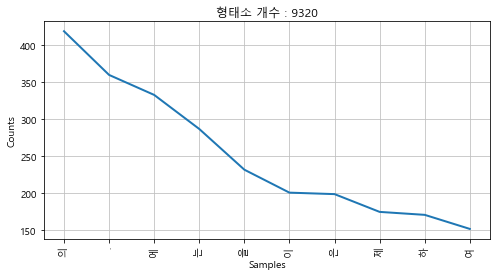

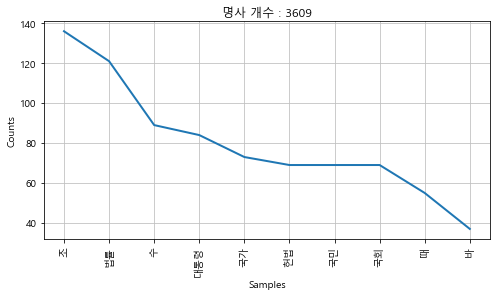

In [57]:
plt.figure(figsize=(8, 4))
plt.title("형태소 개수 : " + str(len(nltk_morphs_law.tokens)))
nltk_morphs_law.plot(10)
plt.figure(figsize=(8, 4))
plt.title("명사 개수 : " + str(len(nltk_nouns_law.tokens)))
nltk_nouns_law.plot(10)
plt.show()

#### 3-2 Similar words

In [58]:
# 형태소 기준
nltk_morphs_law.similar('국민')
# 문맥에서 유사한 위치에 나오는 단어들

국회 국가 대한민국 정부 조국 법관 법원 타인 판결 근로 국회의원 대통령 대법원장 법령 농지 정치 책임 인 차 권력


In [59]:
# 명사 기준
nltk_nouns_law.similar('국민')
# 문맥에서 유사한 위치에 나오는 단어들

국회 법률 대통령 대한민국 지향 이 법관 근로자 국회의원 과반수 제안


#### 3-3 Lexical dispersion_plot
* 어휘 분산도 : 토큰화된 단어들이 어느 위치에 많이 분산되어 있는지  
단어들이 같이 많이 등장하는가 확인할 때 유용

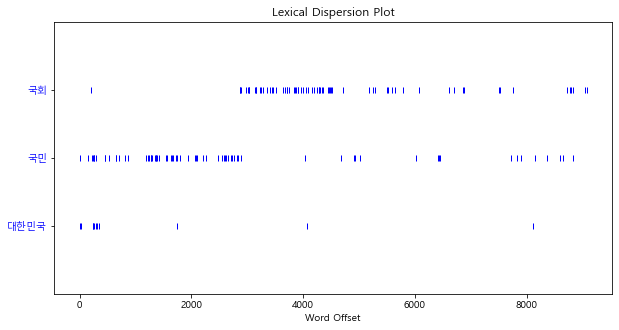

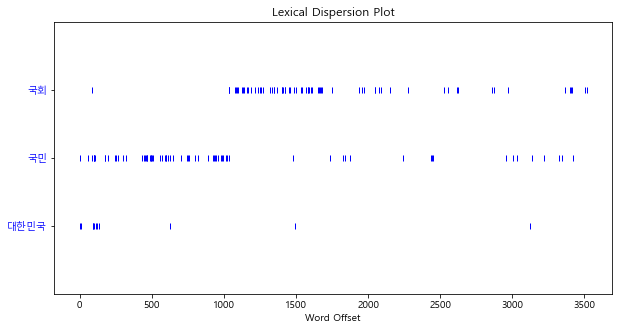

In [65]:
plt.figure(figsize=(10, 5))
nltk_morphs_law.dispersion_plot(['국회', '국민', '대한민국'])
plt.figure(figsize=(10, 5))
nltk_nouns_law.dispersion_plot(['국회', '국민', '대한민국'])
plt.show()

#### 3-4. Searching Text(Concordance)
* Concordance : 근처에 있는 단어들 확인
- width : 사이즈
- lines : 출력할 문장 갯수

In [70]:
nltk_morphs_law.concordance('국회', width=20, lines=10)

Displaying 10 of 69 matches:
 헌법 을 이제 국회 의 의결 을 거
 . 제 3 장 국회 제 40 조 입
 조 입법권 은 국회 에 속한다 . 
제 41 조 ① 국회 는 국민 의 보
고 는 회기 중 국회 의 동의 없이 
인 이 아닌 한 국회 의 요구 가 있
조 국회의원 은 국회 에서 직무 상 
결 에 관하 여 국회 외 에서 책임 
제 47 조 ① 국회 의 정기회 는 
집회 되 며 , 국회 의 임시회 는 


In [71]:
nltk_nouns_law.concordance('국회', width=20, lines=10)

Displaying 10 of 69 matches:
 차 개정 헌법 국회 의결 국민 투표
 이익 처우 장 국회 조 입법권 국회
국회 조 입법권 국회 조 국회 국민 
입법권 국회 조 국회 국민 보통 평등
 제외 회기 중 국회 동의 체포 구금
구금 때 현행범 국회 요구 회기 중 
방 조 국회의원 국회 직무 발언 표결
직무 발언 표결 국회 외 책임 조 국
득 알선 수 조 국회 정기회 법률 바
률 바 회 집회 국회 임시회 대통령 


In [72]:
# 단어 출현 갯수
nltk_nouns_law.index('국회')

85

#### 3-5 Collocation
* collocation : 연어 -> 같이 자주 등장하는 단어

In [75]:
nltk_morphs_law.collocations(window_size=5)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\User/nltk_data'
    - 'C:\\Users\\User\\anaconda3\\nltk_data'
    - 'C:\\Users\\User\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\User\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\User\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


### 4. WordCloud

In [76]:
from wordcloud import WordCloud

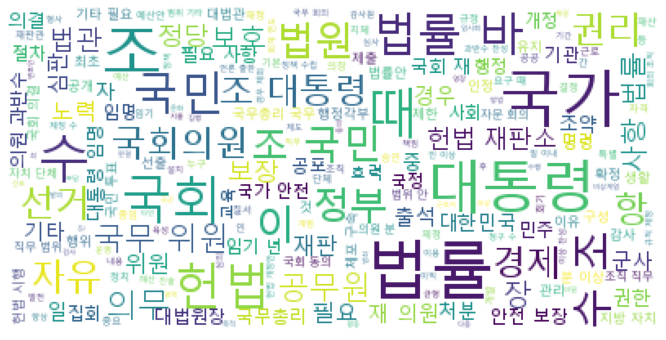

In [81]:
MG_path = fm.findfont('Malgun Gothic')
wc = WordCloud(font_path=MG_path, max_font_size=40, background_color="white").generate(' '.join(nltk_nouns_law))
plt.figure(figsize=(12, 6))
plt.imshow(wc)
plt.axis("off")
plt.show()

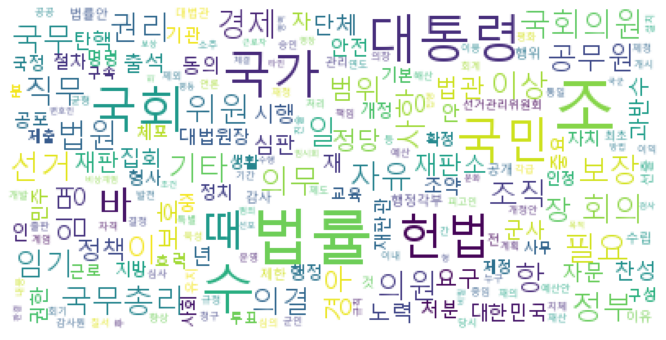

In [82]:
MG_path = fm.findfont('Malgun Gothic')
wc = WordCloud(font_path=MG_path, max_font_size=40, background_color="white", collocations=False).generate(' '.join(nltk_nouns_law))
plt.figure(figsize=(12, 6))
plt.imshow(wc)
plt.axis("off")
plt.show()

### 5. vocabulary 만들기
* 단어사전 만들기
1) 단어를 토큰화하고 하나의 리스트로 만듦
2) 중복되는 단어 제거, 토큰의 출현빈도 순으로 내림차순 정렬
3) 각 토큰에 정수 부여하고 dictionary 생성

#### 5-1 pos function 응용

In [83]:
# 명사는 nouns라는 함수를 이용하면 쉽게 추출이 가능한데요.
# 특수기호는 형태소 분석을 한 후에 추출을 해야 합니다. 
# 특수기호까지 추출하는 함수를 만들어 보겠습니다.
def extended_extraction(text):
    pos = mecab.pos(text,flatten=True,join=False) # explicit하게 표현해주는게 중요
    extended_list = []
    for i in range(len(pos)):
        #명사 : NP, NNB, NNP, NNG
        #특수기호 : SF, SY
        if pos[i][1] in('NP','NNB','NNP','NNG','SF','SY'): # 명사와 특수기호만 추출
            extended_list.append(pos[i][0])
    return extended_list
# 새로 만든 함수를 이용하여 문장의 명사와 특수기호만을 추출해서 토큰화 합니다.
# 이 함수를 이용해서 나중에 dictionary를 만들때와 문자를 숫자열로 변환하는 작업을 실습 해보시기 바랍니다.
token_list = extended_extraction(constitution)
token_list[:10]

['대한민국', '헌법', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시']

#### 5-2 Count frequency and sorting

In [89]:
# 2) 토큰의 출현 빈도 순으로 내림차순 정렬
from collections import Counter

vocab_collection = Counter(token_list)
print("고유한 토큰 갯수 :", len(vocab_collection))

vocab = vocab_collection.most_common(len(vocab_collection))
print("빈도순으로 정렬 :", vocab[:5])

고유한 토큰 갯수 : 867
빈도순으로 정렬 : [('.', 360), ('법률', 121), ('수', 89), ('대통령', 84), ('조', 79)]


#### 5-3 mapping string from integer

In [90]:
# 3) 각 토큰에 정수를 부여하고 dictionary 생성
dic = {}
i = 0
for (word, frequency) in vocab:
    i += 1
    dic[word] = i
print(dic)

{'.': 1, '법률': 2, '수': 3, '대통령': 4, '조': 5, '①': 6, '②': 7, '국가': 8, '헌법': 9, '국민': 10, '국회': 11, '때': 12, '③': 13, '바': 14, '필요': 15, '위원': 16, '기타': 17, '법원': 18, '보장': 19, '정부': 20, '사항': 21, '국무': 22, '이': 23, '항': 24, '자유': 25, '권리': 26, '선거': 27, '의원': 28, '회의': 29, '경제': 30, '④': 31, '국회의원': 32, '의무': 33, '직무': 34, '국무총리': 35, '임명': 36, '조직': 37, '이상': 38, '임기': 39, '의결': 40, '공무원': 41, '경우': 42, '장': 43, '범위': 44, '보호': 45, '법관': 46, '정책': 47, '정당': 48, '재판소': 49, '노력': 50, '재판': 51, '단체': 52, '요구': 53, '심판': 54, '집회': 55, '군사': 56, '시행': 57, '재': 58, '과반수': 59, '출석': 60, '찬성': 61, '자문': 62, '대한민국': 63, '안': 64, '안전': 65, '조약': 66, '자': 67, '⑤': 68, '중': 69, '처분': 70, '인': 71, '동의': 72, '탄핵': 73, '권한': 74, '민주': 75, '공포': 76, '기관': 77, '중요': 78, '재판관': 79, '대법원장': 80, '사회': 81, '기본': 82, '정치': 83, '개정': 84, '효력': 85, '체포': 86, '절차': 87, '형사': 88, '교육': 89, '근로': 90, '국정': 91, '행정': 92, '명령': 93, '지방': 94, '자치': 95, '생활': 96, '제정': 97, '투표': 98, '인정': 99, '구속': 100, '구성': 101, '

#### CountVectorizer 이용하기

In [91]:
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
cv = CountVectorizer()

In [99]:
morphs_ft = cv.fit_transform(morphs_law) # 카운트 기반으로 벡터화

In [120]:
print(morphs_ft[:5])

  (0, 362)	1
  (1, 1049)	1
  (2, 688)	1
  (4, 638)	1


In [100]:
# vocab dictionary
cv.vocabulary_

{'대한민국': 362,
 '헌법': 1049,
 '유구': 688,
 '역사': 638,
 '전통': 811,
 '빛나': 495,
 '우리': 665,
 '대한': 361,
 '국민': 248,
 '운동': 668,
 '으로': 697,
 '건립': 164,
 '임시': 755,
 '정부': 822,
 '법통': 442,
 '불의': 484,
 '항거': 1031,
 '19': 40,
 '민주': 413,
 '이념': 720,
 '계승': 191,
 '조국': 846,
 '개혁': 156,
 '평화': 1001,
 '통일': 978,
 '사명': 500,
 '입각': 758,
 '정의': 825,
 '인도': 736,
 '동포': 373,
 '로써': 387,
 '민족': 412,
 '단결': 332,
 '공고히': 200,
 '모든': 400,
 '사회': 515,
 '폐습': 1004,
 '타파': 972,
 '자율': 772,
 '조화': 854,
 '바탕': 415,
 '자유': 771,
 '기본': 296,
 '질서': 916,
 '더욱': 364,
 '확고히': 1060,
 '정치': 829,
 '경제': 184,
 '문화': 410,
 '영역': 646,
 '어서': 624,
 '각인': 138,
 '기회': 305,
 '균등히': 277,
 '능력': 326,
 '최고': 954,
 '도로': 365,
 '발휘': 424,
 '권리': 268,
 '따르': 380,
 '책임': 932,
 '의무': 708,
 '완수': 658,
 '생활': 530,
 '균등': 276,
 '향상': 1047,
 '기하': 304,
 '항구': 1032,
 '세계': 556,
 '인류': 738,
 '공영': 207,
 '이바지': 722,
 '으로써': 700,
 '자손': 767,
 '안전': 615,
 '행복': 1038,
 '영원히': 647,
 '확보': 1062,
 '면서': 391,
 '1948': 41,
 '12': 22,
 '제정': 841,
